In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab
from gensim.models.word2vec import Word2Vec
import matplotlib.font_manager as fm
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
font_path = '/home/devcat/anaconda3/envs/devcat/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rcParams["figure.figsize"] = (30, 20)
register_matplotlib_converters()

print(font_name)

NanumGothic


In [3]:
doc1 = pd.read_csv('/home/devcat/data/AA/kaggle_chat.csv', encoding='utf-8')
doc2 = pd.read_csv('/home/devcat/data/AA/python_chat.csv', encoding='utf-8')
doc3 = pd.read_csv('/home/devcat/data/AA/torch_chat.csv', 
encoding='utf-8')
stop_words = pd.read_csv('./stopwords.txt',encoding='utf-8')
data = pd.concat([doc1,doc2,doc3])

In [4]:
def process(df):
    doc = df['Message'].tolist()
    clean_doc = []
    for sen in doc:
        if 'chatroom' in sen:
            continue
        elif 'Photo' in sen:
            continue
        elif 'this' in sen:
            continue
        else:clean_doc.append(sen)

    return clean_doc

def regex(readData):
    text = re.sub('[0123456789.a.b.c.d.e.f.g.h.i.j.k.l.m.n.o.p.q.r.s.t.u.v.w.x.y.z;\-\_=+#/\?:^$.,@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)
 
    return text

In [5]:
stop_words = stop_words['words'].tolist()
clean_doc = process(data)

In [6]:
mecab = Mecab()
keyword = [mecab.nouns(sen) for sen in clean_doc]
keyword = [word for word in keyword if word not in stop_words]

In [7]:
keyword = [sen for sen in keyword if len(sen)!=0]

In [8]:
results = []
for idx, sen in enumerate(keyword):
    results.append([])
    for word in sen:
        if len(word)>=2:results[idx].append(word)
results = [sen for sen in results if len(sen)!=0]

In [9]:
results

[['주재걸', '교수', '선형', '대수', '강의', '어보', '신분'],
 ['질문'],
 ['때문', '세부', '기억'],
 ['선형', '방정식', '설명', '부분', '이해', '내용', '질문'],
 ['이곳', '질문', '전문', '가분'],
 ['안녕'],
 ['환영'],
 ['안녕',
  '통계학',
  '관련',
  '질문',
  '당뇨병',
  '여부',
  '판단',
  '이진',
  '분류',
  '문제',
  '연령',
  '속성',
  '진행',
  '질문',
  '내용',
  '관련',
  '그래프',
  '첨부',
  '데이터',
  '환자',
  '환자',
  '집단',
  '연령',
  '평균',
  '정도',
  '차이',
  '그래프',
  '참고',
  '차이',
  '차이',
  '확인',
  '집단',
  '연령',
  '집단',
  '정규분포',
  '전제',
  '충족',
  '그래프',
  '참고',
  '경우',
  '사용',
  '수행',
  '결과',
  '신뢰',
  '걸까요',
  '집단',
  '차이',
  '차이',
  '검증',
  '방법',
  '걸까요',
  '감사'],
 ['오타', '수정', '수행', '수행'],
 ['충족',
  '기억',
  '정규',
  '검정',
  '테스트',
  '패키지',
  '검색',
  '겁니다',
  '학부',
  '수준',
  '개수',
  '이상',
  '경우',
  '심극',
  '정리',
  '정규',
  '분포',
  '시각화',
  '판단',
  '패키지',
  '검정'],
 ['정규', '성검', '정도', '히스토그램', '정규', '검정', '만족', '경우', '변환', '모수', '방법', '이용'],
 ['답변', '감사', '정규', '위반', '판단', '샤피로', '윌크', '테스트', '정규', '만족', '감사'],
 ['반대', '말씀', '정규', '만족'],
 ['변환', '정규', '충족', '모수', '방법

In [9]:
%%time
model = Word2Vec(results)

CPU times: user 313 ms, sys: 4.93 ms, total: 318 ms
Wall time: 255 ms


In [10]:
model.save('Keyword_vector')

In [11]:
from sklearn.manifold import TSNE
import gensim.models as g

model = g.Doc2Vec.load('./Keyword_vector')
vocab = list(model.wv.vocab)
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:400,:])

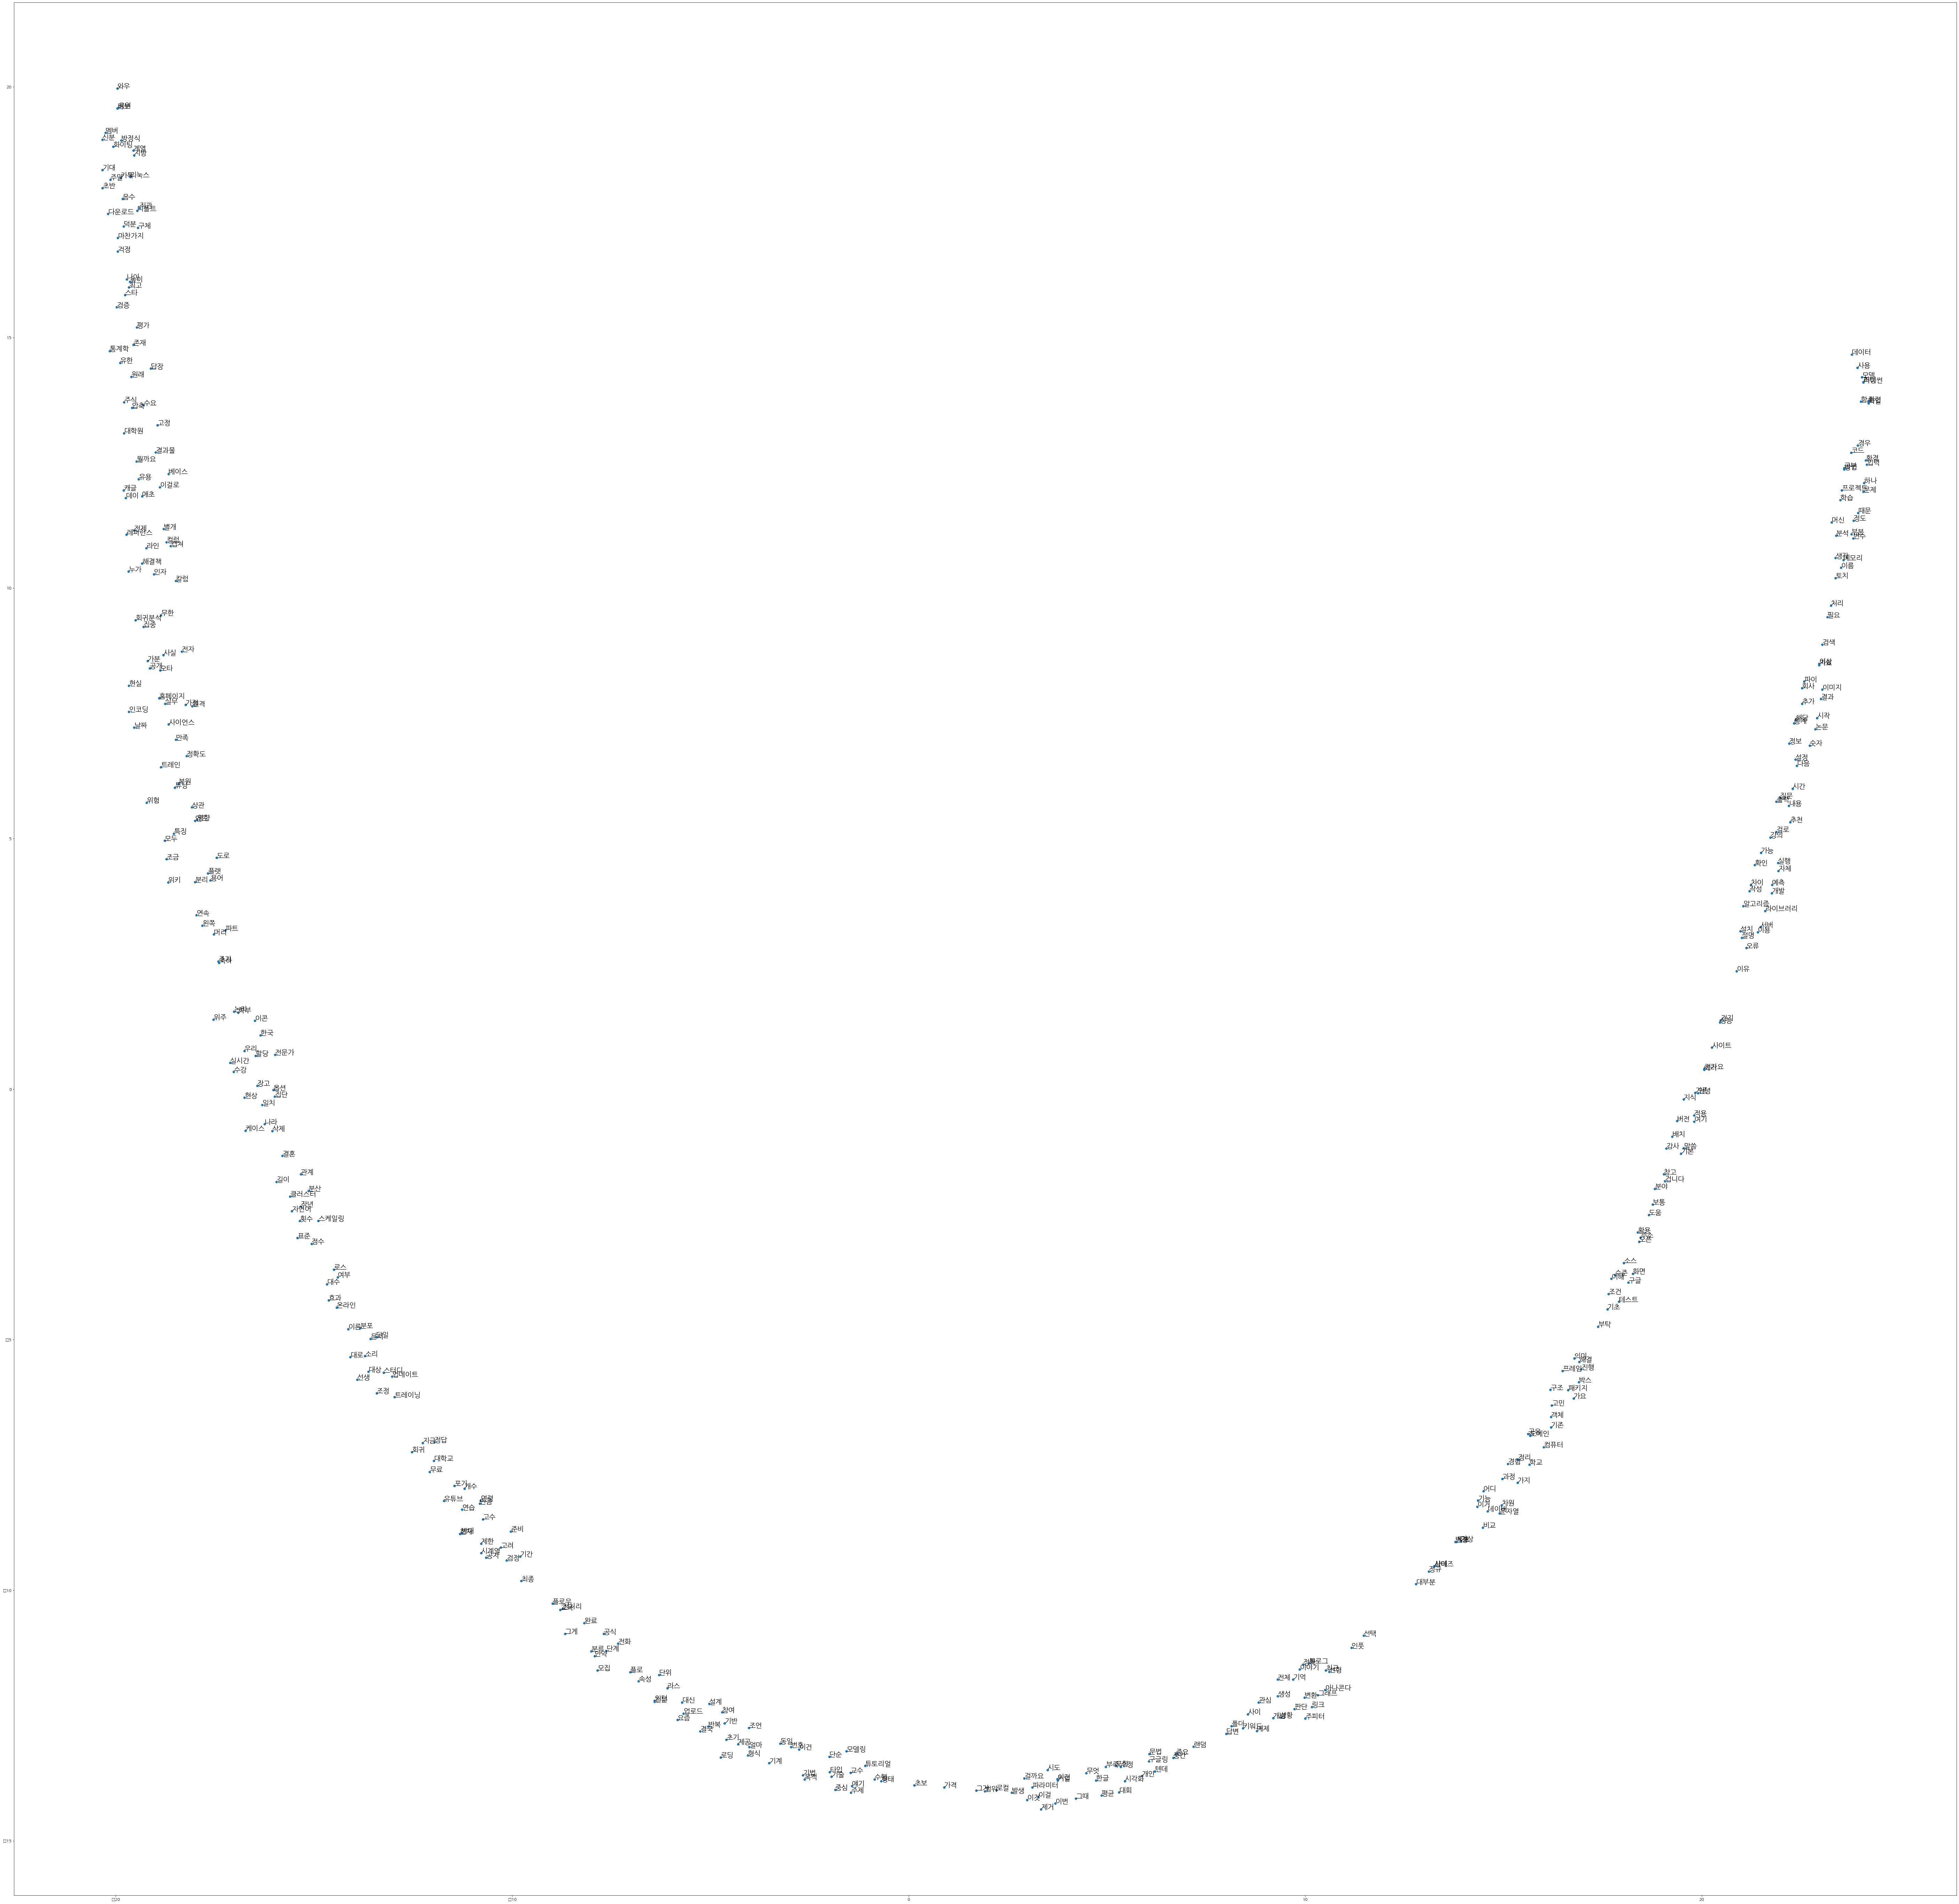

In [12]:
df = pd.DataFrame(X_tsne, index=vocab[:400], columns=['x', 'y'])
fig = plt.figure()
fig.set_size_inches(100, 100)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=20)
plt.show()